# Title: DigiTalyer: Online Mekaniko for your Auto

## Executive Summary

Autoserved is a tech start-up with the aim to automating automotive maintenance. Their software has a predictive maintenance feature that can figure out when a vehicle's next maintenance is due and what needs to be done. It also functions as an online forum where car owners and their maintenance and repair providers (shops, garages) can meet and negotiate about what needs to be done and how much the work will cost. **Autoserved decided to improve their maintenance scheduling algorithm**, so the Data Science Cohort 6 Fellows of Eskwelabs worked with them to solve their current requirements. This project aims to **develop a recommender engine that can predict potential car maintenance services based on a set of input variables.**

The history of customer transactions from Autoserved's database was examined in this project, which spanned the years 2018 to 2021.

---- Model -----

---- Conclusion ----

[Reference Technical Report](https://courses.eskwelabs.com/courses/18/files/6065)

## Table of Contents

#### 1. Introduction

#### 2. Business Objective
* 2.1 Limitation

#### 3. Dataset
* 3.1 Schema (Columns)
* 3.2 Data Preview
* 3.3 Statistical Summary
* 3.4 Final Features

#### 4. Data Cleaning and Preparation

#### 5. Exploratory Data Analysis

#### 6. Data Preprocessing
* 6.1 Encoding

#### 7. Modelling
* 7.1 Model Fitting
* 7.2 Model Optimization and Hyperparameter Tuning
* 7.3 Metric and Result Interpretation
* 7.4 Test Prediction
* 7.5 Recommender Engine

#### 8. Final Results and Recommendations


##  1. Introduction 

Autoserved is a tech start-up with the aim to automating automotive maintenance. Their software has a predictive maintenance feature that can figure out when a vehicle's next maintenance is due and what needs to be done. It also functions as an online forum where car owners and their maintenance and repair providers (shops, garages) can meet and negotiate about what needs to be done and how much the work will cost.

Autoserved decided to improve their maintenance scheduling algorithm, so the Data Science Cohort 6 Fellows of Eskwelabs worked with them to solve their current requirements.

## 2. Business Objective

The main goal is to develop a recommender engine that can predict potential car maintenance services based on a set of input variables.

### 2.1 Limitation

* For any Recommender Engine one of the limitation that it faces is the term 'Cold Start' where there is nothing to recommend for users that doesn't have any transaction history within the system. This also applies to our model, where the issue is that the recommeder engine will have a hard time recommending newer or latest car make, model and year because their data is non existent within the data set. This can be addressed by making another model which caters to all cars in general, a rather crude approach compared to the original recommender engine.


## 3. Dataset

The data came from  Autoserved's database, which contains the history of their customers' transactions in their repair shops from 2018 to 2021.

### 3.1 Data Schema
###    The Original dataset was comprised of the following columns:
    
* Created - Input data date Creation.

* Mileage In - Total Mileage of the vehicle when brought into the repair shop.

* Mileage Out - Total Mileage of the vehicle when coming out of the repair shop.

* Work Order - Value to indicate the job/work order. Unique for every transactions.

* Model - Vehicle Model/Type.

* Engine - Engine Identification Number.

* Line Type - Kind of Services done; Can either be Labor or Material

* Service Category - Main Service package availed.

* Service Package - Service Category breakdown.

* Description - Work order brief description.

* Price - Price of the material or labor done.

* Quantity - Total number of materials purchased.

* Cost - Total cost of the materials purchased.

* Total - Total price of the material and labor done to the vehicle (discount exclusive).

* Part Number - Part ID that was replaced or serviced on.

* Manufacturer - Replacement part manufacture.

* Discount - Discounted amount from the total price.

* Net Total - Total price of the material and labor done to the vehicle (discount inclusive).

* VIN - Vehicle Identification Number.

* ContactID - Unique Identifier for the Vehicle owner.

* ServiceItemID - Unique Identifier for the Material/Parts. (local system)

* InvoiceID - Input data date Creation.

* Make - Vehicle Make/Brand (i.e. Honda, Mitsubishi, Hyundai, etc.)

* Year - Vehicle release year.

### 3.2 Dataset Preview
    

#### Importing the core packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',50)

In [2]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, make_scorer, multilabel_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix, jaccard_score, accuracy_score, hamming_loss
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import ClassifierChain

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier

from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.ensemble import RakelD, LabelSpacePartitioningClassifier
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.ext import download_meka, Meka

import statistics
from zipfile import BadZipFile

In [3]:
meka_classpath = download_meka()

MEKA 1.9.2 found, not downloading


## 5. Exploratory Data Analysis

In [3]:
# reading the original CSV file
master_df = pd.read_csv('Final_Final 2.csv')

#### Total Number of Columns and Rows in the Data Set. 

In [4]:
# Shape of the Data set
master_df.shape

(30585, 23)

#### Previewing the Top and Last 5 entries of the Data set

In [5]:
master_df.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
0,17,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Rear Crankshaft Oil Seal,Engine Crankshaft Seal Kit,1119.40,1.00,1119.40,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
1,18,2018-12-26 10:37:00,68624,33,getz,Labor,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Labor,NaN,446.43,12.71,5674.13,0.0,5674.13,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
2,19,2018-12-26 10:37:00,68624,33,getz,Labor,Engine,PRIMARY CONCERN RECOMMENDATION - Re-seal Oil P...,Labor,NaN,446.43,3.00,1339.29,0.0,1339.29,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Engine Oil / Oil Filter,False,HATCHBACK
3,20,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Clutch Cover,NaN,2462.69,1.00,2462.69,0.0,2462.69,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
4,21,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,GEARMASTER SAE 90,Automatic Transmission Fluid,186.57,3.00,559.71,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Transmission Fluid Replacement & Filter Service,False,HATCHBACK


In [6]:
master_df.tail()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
30580,43003,2021-03-16 15:16:00,24616,2306,wigo,Labor,Change Oil,Change Oil Package - FULLY Synthetic (3L),Labor,NaN,446.43,1.0,446.43,0.0,446.43,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30581,43004,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),ENGINE FLUSHING,NaN,267.87,1.0,267.87,0.0,267.87,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30582,43005,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),REPSOL ELITE MULTIVALVULAS 10W40 - 1L,Engine Oil,607.14,3.0,1821.42,0.0,1821.42,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30583,43006,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),OIL FILTER,NaN,428.57,1.0,428.57,0.0,428.57,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30584,43007,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),POWER COOLANT,NaN,178.57,1.0,178.57,0.0,178.57,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK


#### Checking data types of the data

In [7]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30585 entries, 0 to 30584
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Primary Key       30585 non-null  int64  
 1   Created           30585 non-null  object 
 2   Mileage In        30585 non-null  int64  
 3   Work Order        30585 non-null  int64  
 4   Model             30585 non-null  object 
 5   Line Type         30585 non-null  object 
 6   Service Category  30585 non-null  object 
 7   Service Package   30563 non-null  object 
 8   Description       30585 non-null  object 
 9   Definition        13496 non-null  object 
 10  Price             30585 non-null  float64
 11  Quantity          30585 non-null  float64
 12  Total             30585 non-null  float64
 13  Discount          30585 non-null  float64
 14  Net Total         30585 non-null  float64
 15  ContactID         30585 non-null  object 
 16  ServiceItemID     30585 non-null  object

#### Total Number of Null Values in the dataset.
It can be seen that half of the features in the dataset have some null values in them.

In [8]:
master_df.isna().sum()

Primary Key             0
Created                 0
Mileage In              0
Work Order              0
Model                   0
Line Type               0
Service Category        0
Service Package        22
Description             0
Definition          17089
Price                   0
Quantity                0
Total                   0
Discount                0
Net Total               0
ContactID               0
ServiceItemID           0
InvoiceID               0
Make                    0
Year                    0
labels                  0
is_same_label           0
body type               0
dtype: int64

## 4. Data Cleaning and Preparation

#### The following steps was done for the Data Cleaning and Manipulation.


* The Make Column was first cleaned, multiple spelling errors was observed, replaced and the characters was converted to lowercase. 

* The Model Column was checked for input errors mainly on the spelling. The Make and Model was cleaned simulataneously because some of the row, if model is given the vehicle make can be provided but can't be done in reverse. all the null values are dropped.

* The Year Column also was cleaned, since some of the entry is blank the Vehicle Indentification Number (VIN) was used to decode when the vehicle was released. All the null values are dropped.

* The Mileage In was preserved, since there are no null values present.

* The Service Category has been split into three the 'Minor Preventive Maintenance', 'Major Preventive Maintenance' and the 'Change Oil' in preparation for the modelling process. 

### 4.1 Basic Statistical Summary

In [9]:
master_df.describe(include = 'all')

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
count,30585.000000,30585,3.058500e+04,30585.000000,30585,30585,30585,30563,30585,13496,30585.000000,30585.000000,30585.000000,30585.000000,30585.000000,30585,30585,30585,30585,30585.000000,30585,30585,30585
unique,NaN,5166,NaN,NaN,176,3,17,3128,4757,431,NaN,NaN,NaN,NaN,NaN,2679,3117,5194,21,NaN,59,2,9
top,NaN,2019-07-17 09:33:00,NaN,NaN,vios,Material,Minor Preventive Maintenance Service,MINOR Preventive Maintenance Service,Labor,Engine Oil,NaN,NaN,NaN,NaN,NaN,2ada24ba-be69-4efd-a07b-309c2244803d,5269c830-5c47-4085-a097-dbdda0627059,2d877d25-d1cb-4a2f-9881-b544f76cc2c5,toyota,NaN,Minor Preventive Maintenance Service,True,SEDAN
freq,NaN,78,NaN,NaN,4217,23864,4757,1053,6060,2748,NaN,NaN,NaN,NaN,NaN,696,109,58,10820,NaN,8865,18638,10733
mean,21566.472748,NaN,7.776626e+04,3005.772209,NaN,NaN,NaN,NaN,NaN,NaN,858.293435,1.963795,1332.104155,42.670415,1288.884966,NaN,NaN,NaN,NaN,2012.661828,NaN,NaN,NaN
std,12338.950221,NaN,7.057198e+04,1807.436802,NaN,NaN,NaN,NaN,NaN,NaN,2418.405794,2.227988,2814.933643,270.553205,2748.736023,NaN,NaN,NaN,NaN,4.033818,NaN,NaN,NaN
min,1.000000,NaN,0.000000e+00,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN
25%,11041.000000,NaN,3.940500e+04,1520.000000,NaN,NaN,NaN,NaN,NaN,NaN,142.860000,1.000000,174.100000,0.000000,142.870000,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN
50%,22237.000000,NaN,6.435900e+04,2869.000000,NaN,NaN,NaN,NaN,NaN,NaN,417.910000,1.000000,625.000000,0.000000,607.140000,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN
75%,32058.000000,NaN,1.013470e+05,4412.000000,NaN,NaN,NaN,NaN,NaN,NaN,666.670000,2.700000,1517.860000,0.000000,1428.570000,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN


> ### Summary Description
>From the basic statistical summary above, we have observed that: 
>* Toyota has the most number of vehicles in the dataset, with Vios being the most common model.
>* The highest entry in the service category is 'minor preventive maintenance'.


## 5. Exploratory Data Analysis

### Which car manufacturer has the most transactions?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(0, 1, 'mitsubishi'),
  Text(0, 2, 'honda'),
  Text(0, 3, 'ford'),
  Text(0, 4, 'hyundai'),
  Text(0, 5, 'chevrolet'),
  Text(0, 6, 'nissan'),
  Text(0, 7, 'mazda'),
  Text(0, 8, 'isuzu'),
  Text(0, 9, 'suzuki')])

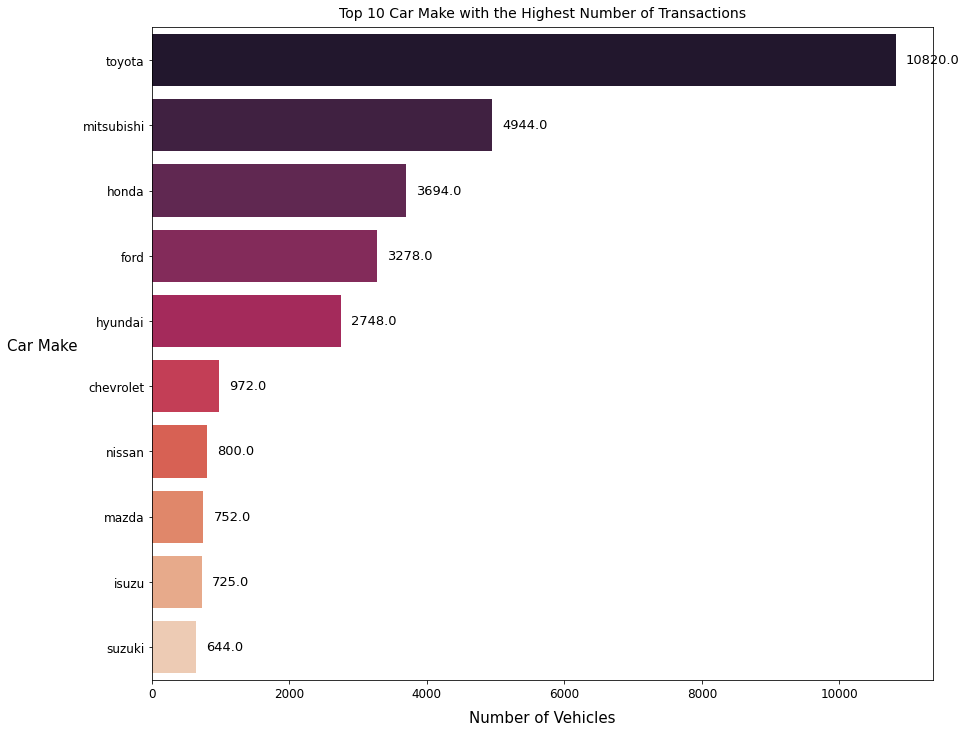

In [10]:
vehicle_make = master_df['Make'].value_counts().sort_values(ascending=False).to_frame()[:10]
plt.figure(figsize = (14,12))
ax = sns.barplot(y=vehicle_make.index, x=vehicle_make['Make'], orient='h', palette='rocket')

# Setting the annotation
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+150, i.get_y()+.45, \
            str(round((i.get_width()), 2)), fontsize=13, color='black')

# Setting the labels and titles
plt.title('Top 10 Car Make with the Highest Number of Transactions', fontsize = 14, pad = 10)
plt.xlabel('Number of Vehicles', size = 15, labelpad = 10)
plt.ylabel('Car Make', size = 15, labelpad = 40, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

>  Insights: 
><br>  Toyota topped the list of car manufacturers with the most service transactions. It is reflective of Toyota’s almost 39% market share of total automotive sales in the Philippines and their parts availability in the market [Source: Statista.com](https://www.statista.com/statistics/1070097/philippines-market-share-leading-automotive-companies/)


### What are the most popular maintenance or repair services?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Minor Preventive Maintenance Service'),
  Text(0, 1, 'Change Oil'),
  Text(0, 2, 'Major Preventive Maintenance Service'),
  Text(0, 3, 'Brakes'),
  Text(0, 4, 'Engine Oil / Oil Filter'),
  Text(0, 5, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(0, 6, 'Engine'),
  Text(0, 7, 'Transmission & Clutch'),
  Text(0, 8, 'Complete Vehicle Inspection'),
  Text(0, 9, 'Fuel Filter / Air Filter'),
  Text(0, 10, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(0, 11, 'Cooling System'),
  Text(0, 12, 'Tires & Wheels'),
  Text(0, 13, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(0, 14, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(0, 15, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(0, 16, 'Batteries')])

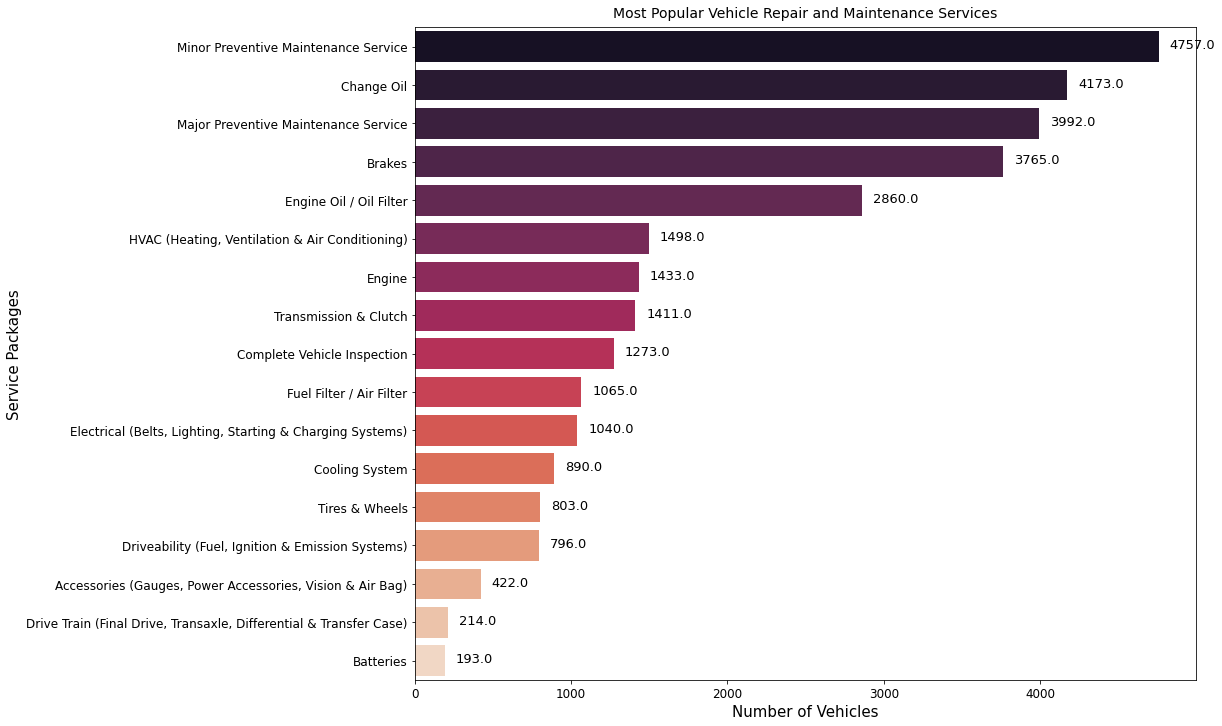

In [11]:
# Top 10 Car Make with the Highest Number of Transactions

vehicle_make = master_df['Service Category'].value_counts().sort_values(ascending=False).to_frame()
plt.figure(figsize = (14,12))
ax = sns.barplot(y=vehicle_make.index, x=vehicle_make['Service Category'], orient='h', palette='rocket')

# Setting the annotation
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+70, i.get_y()+.45, \
            str(round((i.get_width()), 2)), fontsize=13, color='black')

# Setting the labels and titles
plt.title('Most Popular Vehicle Repair and Maintenance Services', fontsize = 14, pad = 10)
plt.xlabel('Number of Vehicles', size = 15)
plt.ylabel('Service Packages', size = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

> ### Insights: 
> On average, 3 out of every 5 car owners go visit the car service centers for an Oil, Lube, & Preventive Maintenance Service.
> <br>Oil change services is very common because the recommended intervals for using mineral oil are at 3000 km, 5000 km, or six months (whichever comes first). [Source: Top Gear Philippines](https://www.topgear.com.ph/features/tip-sheet/change-oil-for-weekend-car-a57-20180728#:~:text=Ordinarily%2C%20the%20recommended%20oil%2Dchange,year%20(whichever%20comes%20first).)


### Since most of the customers are toyota owners, how much do they spend on their maintenance services?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Batteries'),
  Text(0, 1, 'Tires & Wheels'),
  Text(0, 2, 'Cooling System'),
  Text(0, 3, 'Engine'),
  Text(0, 4, 'Transmission & Clutch'),
  Text(0, 5, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(0, 6, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(0, 7, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(0, 8, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(0, 9, 'Engine Oil / Oil Filter'),
  Text(0, 10, 'Brakes'),
  Text(0, 11, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(0, 12, 'Fuel Filter / Air Filter'),
  Text(0, 13, 'Major Preventive Maintenance Service'),
  Text(0, 14, 'Change Oil'),
  Text(0, 15, 'Complete Vehicle Inspection'),
  Text(0, 16, 'Minor Preventive Maintenance Service')])

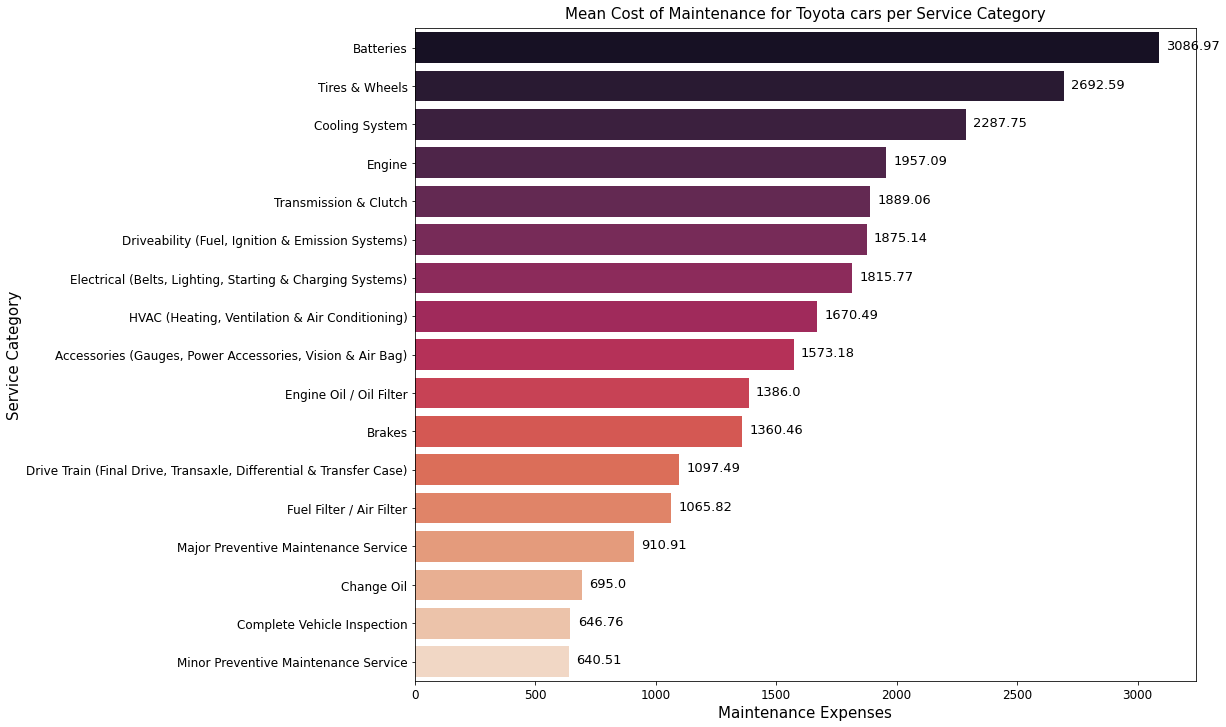

In [12]:
# Further Exploratory Data Analysis on the Toyota Brand
toyota_ = master_df[master_df['Make'] == 'toyota']

# Mean value for each service category
toyota_cost_ownership = toyota_.groupby('Service Category')[['Net Total']].mean().sort_values(by = 'Net Total', ascending = False)


# Visualizations
plt.figure(figsize = (14,12))
ax = sns.barplot(y = toyota_cost_ownership.index, x = toyota_cost_ownership['Net Total'], orient = 'h', palette='rocket')

# Setting the annotation
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+30, i.get_y()+.45, \
            str(round((i.get_width()), 2)), fontsize=13, color='black')

# Setting the labels and titles
plt.title("Mean Cost of Maintenance for Toyota cars per Service Category", fontsize = 15, pad = 10)
plt.xlabel('Maintenance Expenses', size = 15)
plt.ylabel('Service Category', size = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

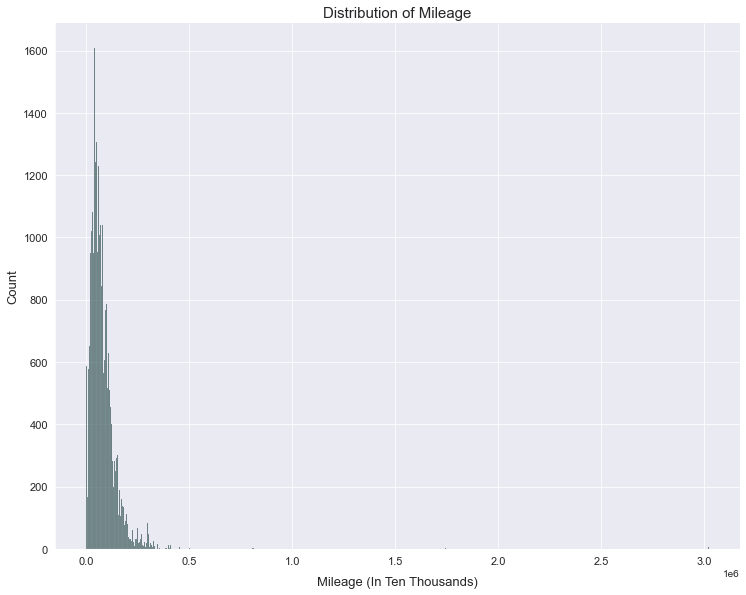

In [13]:
sns.set_style('darkgrid')
sns.displot(data = master_df, x = 'Mileage In', aspect= 1.3, height=8, color = 'darkslategray')
plt.title('Distribution of Mileage', fontsize = 15)
plt.xlabel('Mileage (In Ten Thousands)', fontsize = 13, labelpad = 10)
plt.ylabel('Count', fontsize = 13)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

In [14]:
from scipy.stats import skew, kurtosis

def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"
    
print("Skewness of variable %s : %0.2f (%s)" %('Mileage', skew(master_df['Mileage In']), skew_type(skew(master_df['Mileage In']),0.1)))

def kurtosis_type(kurtval, kurtthres):
    test_kurtosis_value = abs(kurtval-kurtthres)
    #in scipy's implementation, 3 is subtracted from the original definition of kurtosis
    
    if (test_kurtosis_value > 0) & (np.sign(kurtval)>0):
        return "heavy-tailed"
    elif  (test_kurtosis_value  > 0) & (np.sign(kurtval)<0):
        return "light-tailed"
    else:
        return "approximately normal"
print("Kurtosis of variable %s : %0.2f (%s)" %('Mileage', kurtosis(master_df['Mileage In']), kurtosis_type(kurtosis(master_df['Mileage In']),0.1)))   

Skewness of variable Mileage : 15.65 (right-tailed)
Kurtosis of variable Mileage : 605.59 (heavy-tailed)


In [15]:
from scipy import stats
shapiro_test = stats.shapiro(master_df['Mileage In'])
shapiro_test

C:\Users\Padayao\Anaconda3\envs\Data Science\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.600611686706543, pvalue=0.0)

In [16]:
master_df = master_df[master_df['Mileage In'] > 1000]
master_df['Log Mileage In'] = np.log(master_df['Mileage In'])

(array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.]),
 [Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16')])

<Figure size 864x720 with 0 Axes>

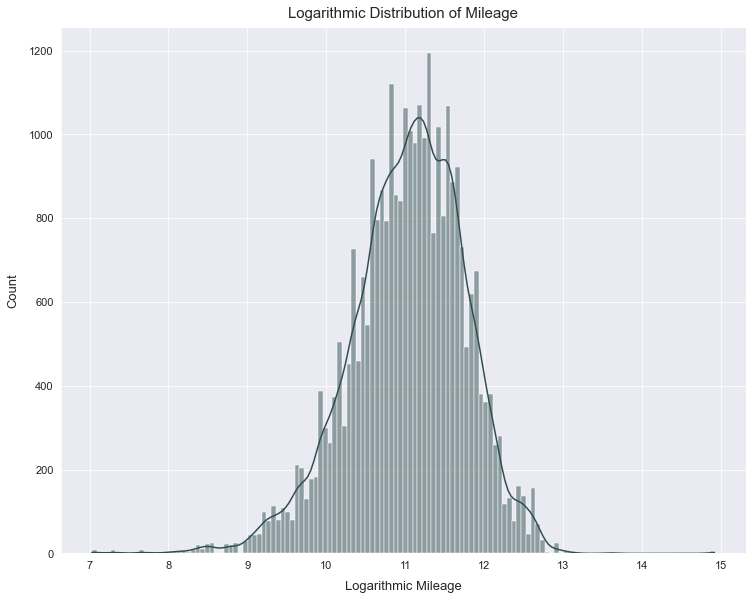

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.displot(data = master_df, x = 'Log Mileage In', aspect= 1.3, height= 8, color = 'darkslategray', kde = True)
plt.title('Logarithmic Distribution of Mileage', fontsize = 15, pad = 10)
plt.xlabel('Logarithmic Mileage', fontsize = 13, labelpad = 10)
plt.ylabel('Count', fontsize = 13, labelpad = 10)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

In [18]:
from scipy.stats import skew, kurtosis

def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"
    
print("Skewness of variable %s : %0.2f (%s)" %('Mileage', skew(master_df['Log Mileage In']), skew_type(skew(master_df['Log Mileage In']),0.1)))

def kurtosis_type(kurtval, kurtthres):
    test_kurtosis_value = abs(kurtval-kurtthres)
    #in scipy's implementation, 3 is subtracted from the original definition of kurtosis
    
    if (test_kurtosis_value > 0) & (np.sign(kurtval)>0):
        return "heavy-tailed"
    elif  (test_kurtosis_value  > 0) & (np.sign(kurtval)<0):
        return "light-tailed"
    else:
        return "approximately normal"
print("Kurtosis of variable %s : %0.2f (%s)" %('Mileage', kurtosis(master_df['Log Mileage In']), kurtosis_type(kurtosis(master_df['Log Mileage In']),0.1)))   

Skewness of variable Mileage : -0.49 (left-tailed)
Kurtosis of variable Mileage : 1.02 (heavy-tailed)


In [19]:
from scipy import stats
shapiro_test = stats.shapiro(master_df['Log Mileage In'])
shapiro_test

C:\Users\Padayao\Anaconda3\envs\Data Science\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9852855205535889, pvalue=0.0)

## 6. Data Preprocessing

In [4]:
df = pd.read_excel('FINAL_FINAL 2.xlsx', index_col='Primary Key')

In [6]:
# remove Batteries

df = df[ (df['Service Category'] != 'Batteries') ]

In [8]:
# get only the necessary columns

df2 = df[['Mileage In', 'Make', 'Model', 'Year', 'Service Category']]

In [9]:
df3 = df2.groupby(['Make', 'Year','Model', 'Mileage In']).agg(list)

In [10]:
df3 = df3.reset_index()

In [11]:
df3['Service Category'] = df3['Service Category'].apply(np.unique)

###  ML Binarizer

In [12]:
mlb = MultiLabelBinarizer()

In [13]:
df4 = df3.join(pd.DataFrame(mlb.fit_transform(df3.pop('Service Category')),
                          columns=mlb.classes_,
                          index=df3.index))

In [14]:
X = df4[['Make', 'Year','Model', 'Mileage In']]

In [15]:
num_categories = len(df['Service Category'].value_counts())
num_categories

16

In [16]:
Y = df4.iloc[:,-num_categories:]

###  Split data

In [17]:
X_train, Y_train, X_test, Y_test = iterative_train_test_split(X.to_numpy(), Y.to_numpy(), test_size = 0.2)

In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3910, 4) (985, 4) (3910, 16) (985, 16)


In [19]:
X_train = pd.DataFrame(X_train ,columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Y_train = pd.DataFrame(Y_train, columns=Y.columns)
Y_test = pd.DataFrame(Y_test, columns=Y.columns)

In [20]:
X_train['Mileage In'] = X_train['Mileage In'].astype(int)
X_test['Mileage In'] = X_test['Mileage In'].astype(int)

In [21]:
# instantiate the jaccard index metric

jaccard = make_scorer(jaccard_score, average='samples')

###  Encoding the categorical features

In [22]:
# instantiate encoder

encoder = ce.count.CountEncoder(cols=['Make', 'Year', 'Model'])

In [23]:
encoder.fit(X_train, Y_train)

C:\Users\Nico\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


CountEncoder(cols=['Make', 'Year', 'Model'], combine_min_nan_groups=True)

In [24]:
# encode features

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [25]:
# rows to remove due to NaN values

rem_rows = X_test[X_test.isnull().any(axis=1)]
rem_rows.index

Int64Index([3, 4, 5, 10, 21, 47, 97, 581, 858, 876, 877, 948, 952], dtype='int64')

In [26]:
X_test.drop(index=rem_rows.index, inplace=True)
Y_test.drop(index=rem_rows.index, inplace=True)

In [27]:
X_test.shape, Y_test.shape

((972, 4), (972, 16))

##  7. Modelling

In [28]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100", # Ensembles of Classifier Chains (ECC)
#         weka_classifier = "weka.classifiers.trees.RandomForest",
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java -Xmx1024m' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java -Xmx1024m',
     meka_classifier='meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [29]:
# cross-validation

cv_score = cross_val_score(meka, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.2583767709982544

In [30]:
# train the model

meka.fit(X_train, Y_train)

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java -Xmx1024m',
     meka_classifier='meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [31]:
# make predictions

y_pred = meka.predict(X_test)

In [32]:
# get the jaccard index

jaccard_score(Y_test, y_pred, average='samples')

0.26619676334182507

###  Post EDA

In [33]:
plt.rc('grid', linestyle="--", color='grey')

In [34]:
Y_pred = pd.DataFrame(y_pred.todense(), index=Y_test.index, columns=Y_test.columns)

Text(0.5, 0.98, 'Predicted vs Test set')

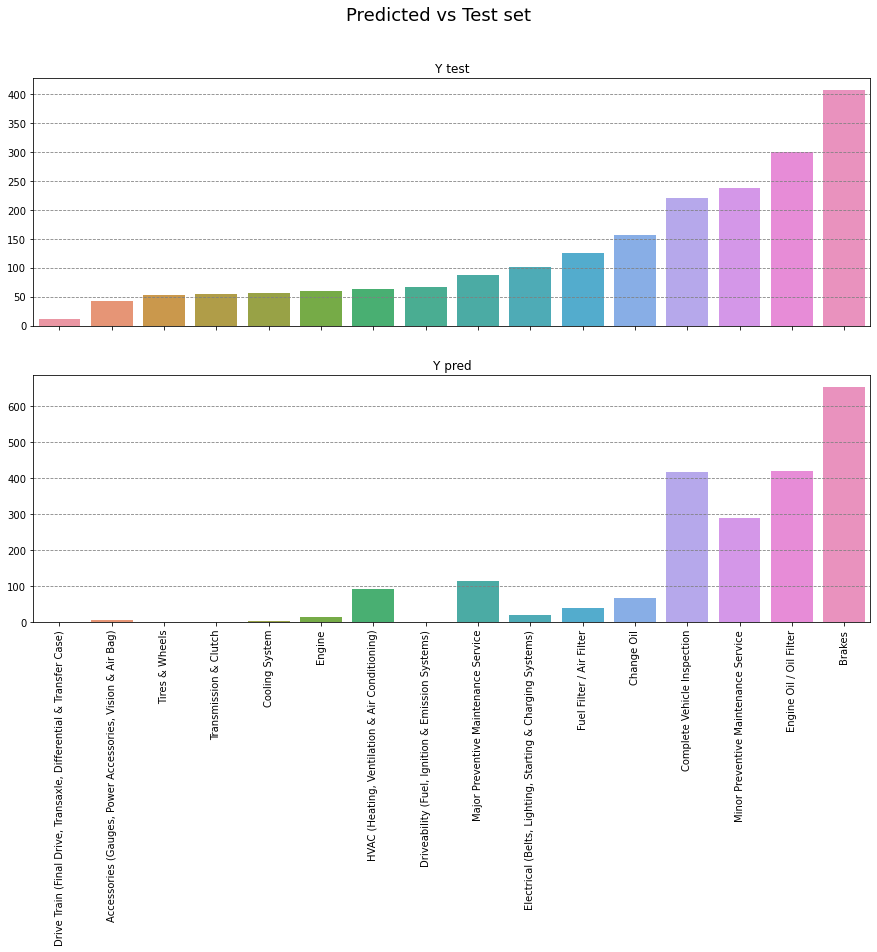

In [35]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,10))

sns.barplot(x=Y_test.sum().sort_values().index, y=Y_test.sum().sort_values().values, ax=axes[0] )
sns.barplot(x=Y_pred.sum().sort_values().index, y=Y_pred.sum().sort_values().values, \
            order=list(Y_test.sum().sort_values().index), ax=axes[1] )

plt.xticks(rotation=90)
axes[0].grid(True, axis='y')
axes[1].grid(True, axis='y')
axes[0].set_title('Y test')
axes[1].set_title('Y pred')

fig.suptitle('Predicted vs Test set', size=18)

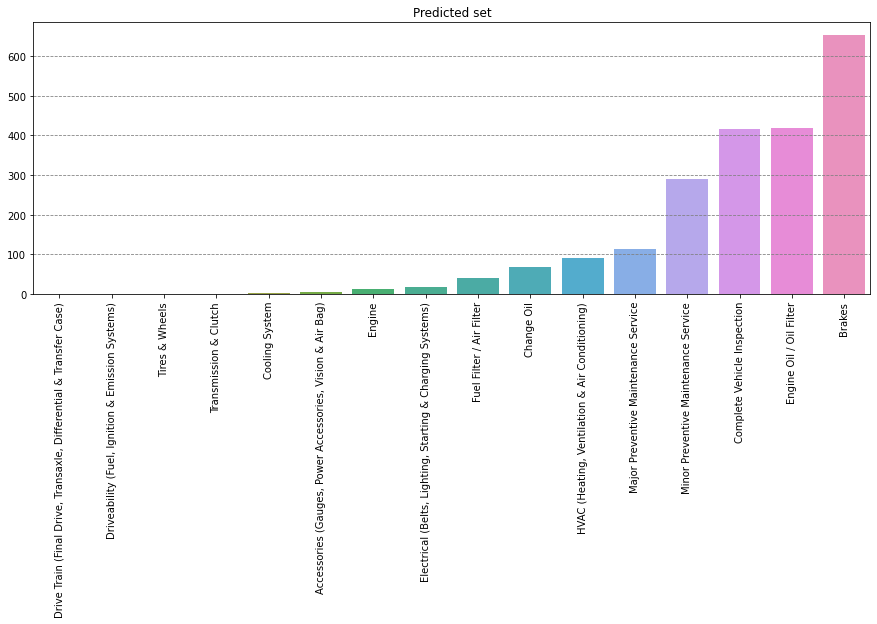

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x=Y_pred.sum().sort_values().index, y=Y_pred.sum().sort_values().values )
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.title('Predicted set')
plt.show()

Text(0.5, 0.98, 'Train vs Test set')

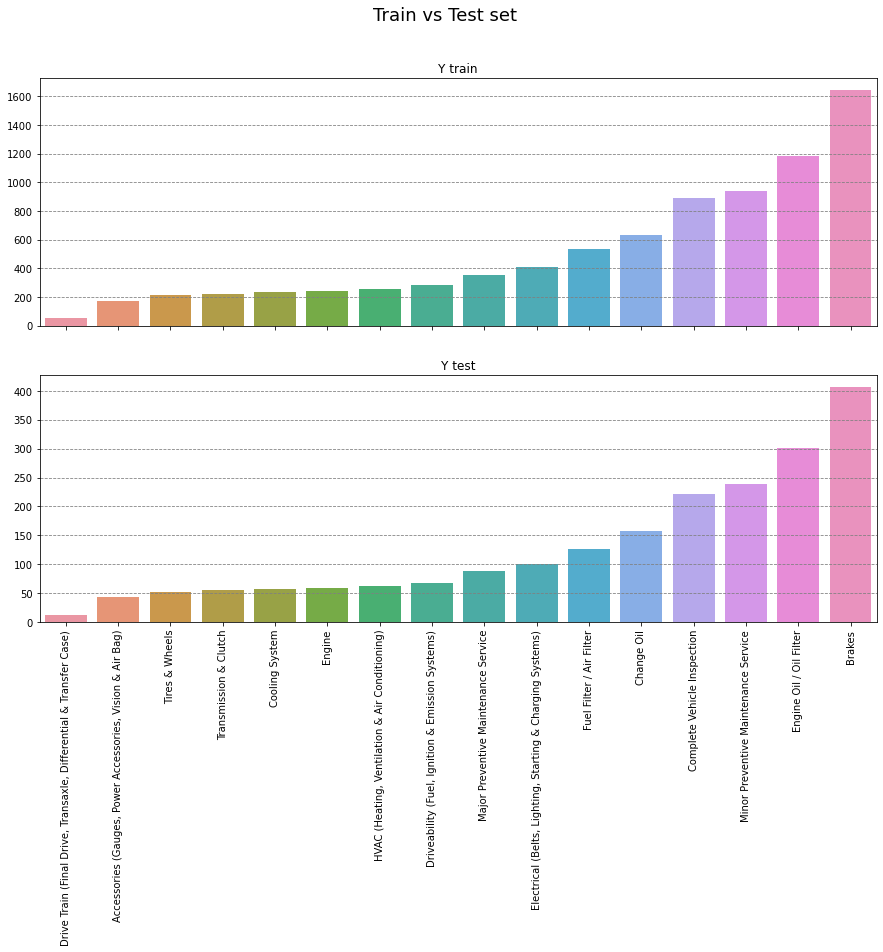

In [37]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,10))

sns.barplot(x=Y_test.sum().sort_values().index, y=Y_test.sum().sort_values().values, ax=axes[1] )
sns.barplot(x=Y_train.sum().sort_values().index, y=Y_train.sum().sort_values().values, \
            order=list(Y_test.sum().sort_values().index), ax=axes[0] )

plt.xticks(rotation=90)
axes[0].grid(True, axis='y')
axes[1].grid(True, axis='y')
axes[1].set_title('Y test')
axes[0].set_title('Y train')

fig.suptitle('Train vs Test set', size=18)

In [38]:
labels = list(Y_test.columns)
labels = np.array(labels)
labels

array(['Accessories (Gauges, Power Accessories, Vision & Air Bag)',
       'Brakes', 'Change Oil', 'Complete Vehicle Inspection',
       'Cooling System',
       'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)',
       'Driveability (Fuel, Ignition & Emission Systems)',
       'Electrical (Belts, Lighting, Starting & Charging Systems)',
       'Engine', 'Engine Oil / Oil Filter', 'Fuel Filter / Air Filter',
       'HVAC (Heating, Ventilation & Air Conditioning)',
       'Major Preventive Maintenance Service',
       'Minor Preventive Maintenance Service', 'Tires & Wheels',
       'Transmission & Clutch'], dtype='<U66')

In [39]:
multilabel_confusion_matrix(Y_test, y_pred).shape

(16, 2, 2)

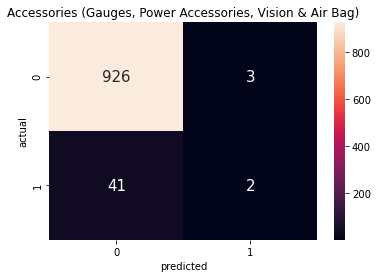

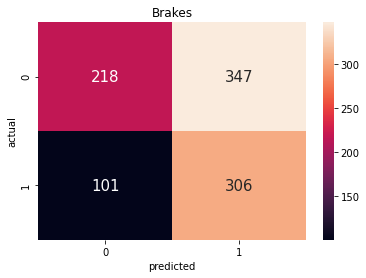

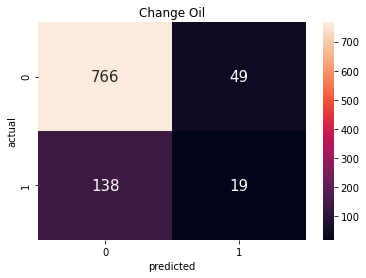

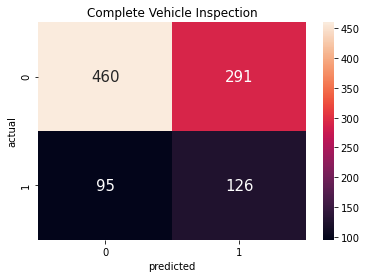

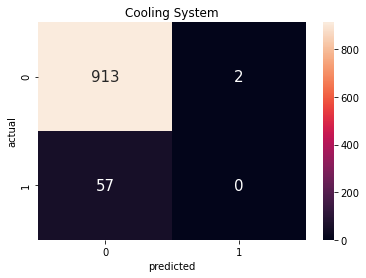

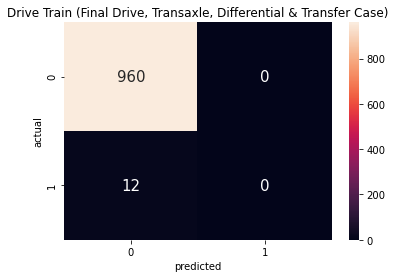

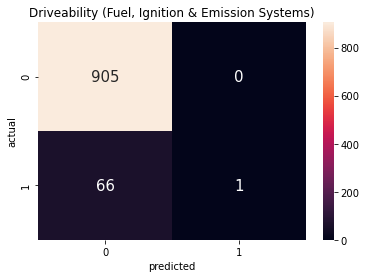

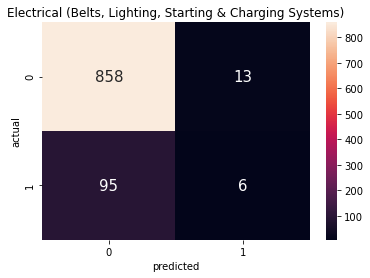

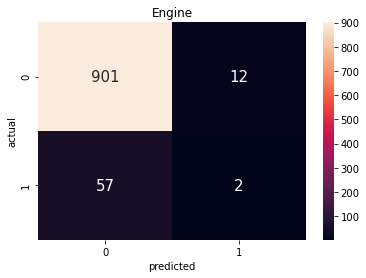

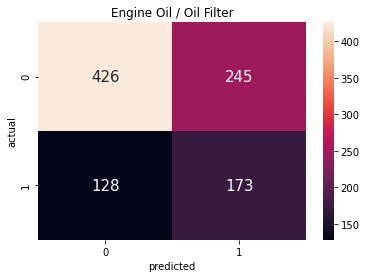

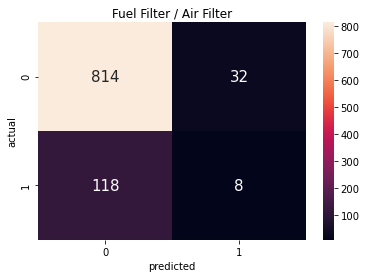

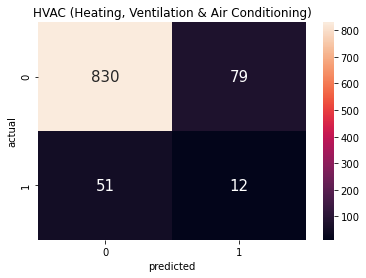

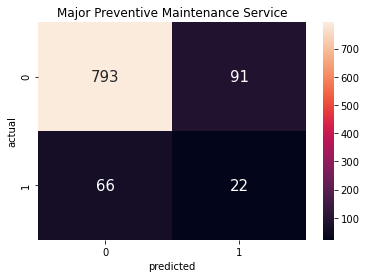

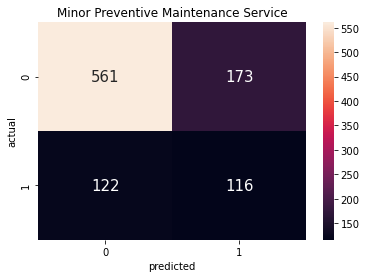

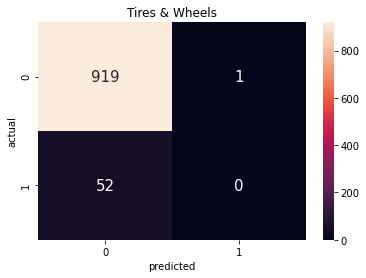

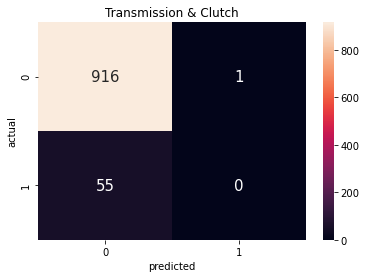

In [40]:
for i in range(16):
    cm = multilabel_confusion_matrix(Y_test, y_pred)[i]
    sns.heatmap(cm, annot=True, fmt='d', annot_kws={"fontsize":15})
    plt.title(labels[i])
    plt.ylabel('actual')
    plt.xlabel('predicted')
    plt.show()

In [41]:
print(classification_report(Y_test, y_pred, target_names=labels))

                                                                    precision    recall  f1-score   support

         Accessories (Gauges, Power Accessories, Vision & Air Bag)       0.40      0.05      0.08        43
                                                            Brakes       0.47      0.75      0.58       407
                                                        Change Oil       0.28      0.12      0.17       157
                                       Complete Vehicle Inspection       0.30      0.57      0.39       221
                                                    Cooling System       0.00      0.00      0.00        57
Drive Train (Final Drive, Transaxle, Differential & Transfer Case)       0.00      0.00      0.00        12
                  Driveability (Fuel, Ignition & Emission Systems)       1.00      0.01      0.03        67
         Electrical (Belts, Lighting, Starting & Charging Systems)       0.32      0.06      0.10       101
                           

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  8. Final Results and Recommendations

<a id=’section_1’></a>
### Final results

Multilabel classification is the prediction of multiple labels simultaneously associated with a single instance. In our case, one instance corresponds to a single vehicle and the labels to different service categories for repair and/or maintenance.

The [jaccard similarity](https://www.learndatasci.com/glossary/jaccard-similarity/#:~:text=1.-,Jaccard%20Similarity%20for%20Two%20Binary%20Vectors,means%20that%20it%20is%20present.) was the metric used to evaluate the performance of the model.

Our model performed with a jaccard similarity of **26.62%** on the test set.

###  Recommendations

1. Splitting the majority class/es even further to reduce imbalance
2. Make use of other encoders for nominal features
3. Combining random under sampling and random oversampling before using multilabel binarizer
4. Try doing regression on price